# 한글깨짐

In [1]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

# 1. 환경설정

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 그래프

## AUROC 비교

In [ ]:
score_df = pd.DataFrame(columns=['알고리즘', 'AUROC'])
score_df

,알고리즘,AUROC


In [ ]:
score_df.loc[0]=['APACHE2', 0.6296]
score_df.loc[1]=['NEWS', 0.6625]
score_df.loc[2]=['MEWS', 0.6865]
score_df.loc[3]=['SOFA', 0.7049]
score_df.loc[4]=['ensemble', 0.8423]
score_df

,알고리즘,AUROC
0,APACHE2,0.6296
1,NEWS,0.6625
2,MEWS,0.6865
3,SOFA,0.7049
4,ensemble,0.8423


In [ ]:
score_graph = score_df.set_index('알고리즘')
score_graph

,AUROC
알고리즘,
APACHE2,0.6296
NEWS,0.6625
MEWS,0.6865
SOFA,0.7049
ensemble,0.8423


<Figure size 1440x1440 with 0 Axes>

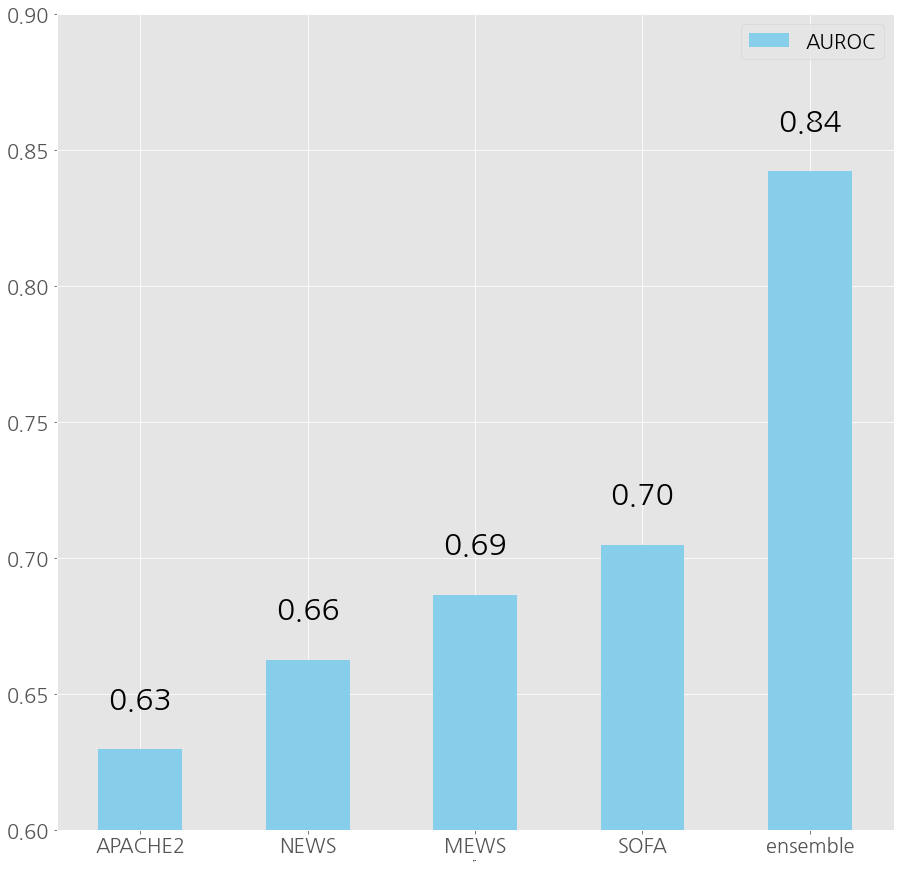

In [ ]:
# AUROC Score 비교교
plt.figure(figsize=(20,20))
plt.style.use('ggplot')

plt.rc('font', size=30)        # 기본 폰트 크기
plt.rc('axes', labelsize=0)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('figure', titlesize=20) # figure title 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기

ax = score_graph.plot(kind='bar', rot=0, color=['skyblue'], figsize=(15,15))
ax.legend(score_graph.columns, loc='best')
ax.set_ylim([0.6, 0.9])

for patch in ax.patches:
    ax.text(x = patch.get_x() + patch.get_width()/2, 
             y = patch.get_height() + len(score_df)*0.003,
             s = f'{patch.get_height():.2f}',
             ha = 'center')

plt.show()

In [ ]:
dmrs_df = pd.DataFrame(columns=['알고리즘', 'True Positive', 'Positive', 'Precision'])
dmrs_df.loc[0]=['SOFA', 12, 29, 0.4137]
dmrs_df.loc[1]=['DMRS', 12, 17, 0.7058]
dmrs_df = dmrs_df.set_index('알고리즘')
dmrs_df

,True Positive,Positive,Precision
알고리즘,,,
SOFA,12,29,0.4137
DMRS,12,17,0.7058


In [13]:
sensitivity_df = pd.DataFrame(columns=['알고리즘', 'False Positive', 'True Positive', 'Positive'])
sensitivity_df

,알고리즘,False Positive,True Positive,Positive


In [14]:
precision_df = pd.DataFrame(columns=['알고리즘', 'Precision']) 
precision_df

,알고리즘,Precision


In [15]:
sensitivity_df.loc[0]=['SOFA', 17, 12, 29]
sensitivity_df.loc[1]=['DMRS', 5, 12, 17]
sensitivity_df

,알고리즘,False Positive,True Positive,Positive
0,SOFA,17,12,29
1,DMRS,5,12,17


In [16]:
sensitivity_df = sensitivity_df.set_index('알고리즘')
sensitivity_df

,False Positive,True Positive,Positive
알고리즘,,,
SOFA,17,12,29
DMRS,5,12,17


In [17]:
precision_df.loc[0]=['SOFA', 0.4137]
precision_df.loc[1]=['DMRS',0.7058]
precision_df

,알고리즘,Precision
0,SOFA,0.4137
1,DMRS,0.7058


In [18]:
precision_df = precision_df.set_index('알고리즘')
precision_df

,Precision
알고리즘,
SOFA,0.4137
DMRS,0.7058


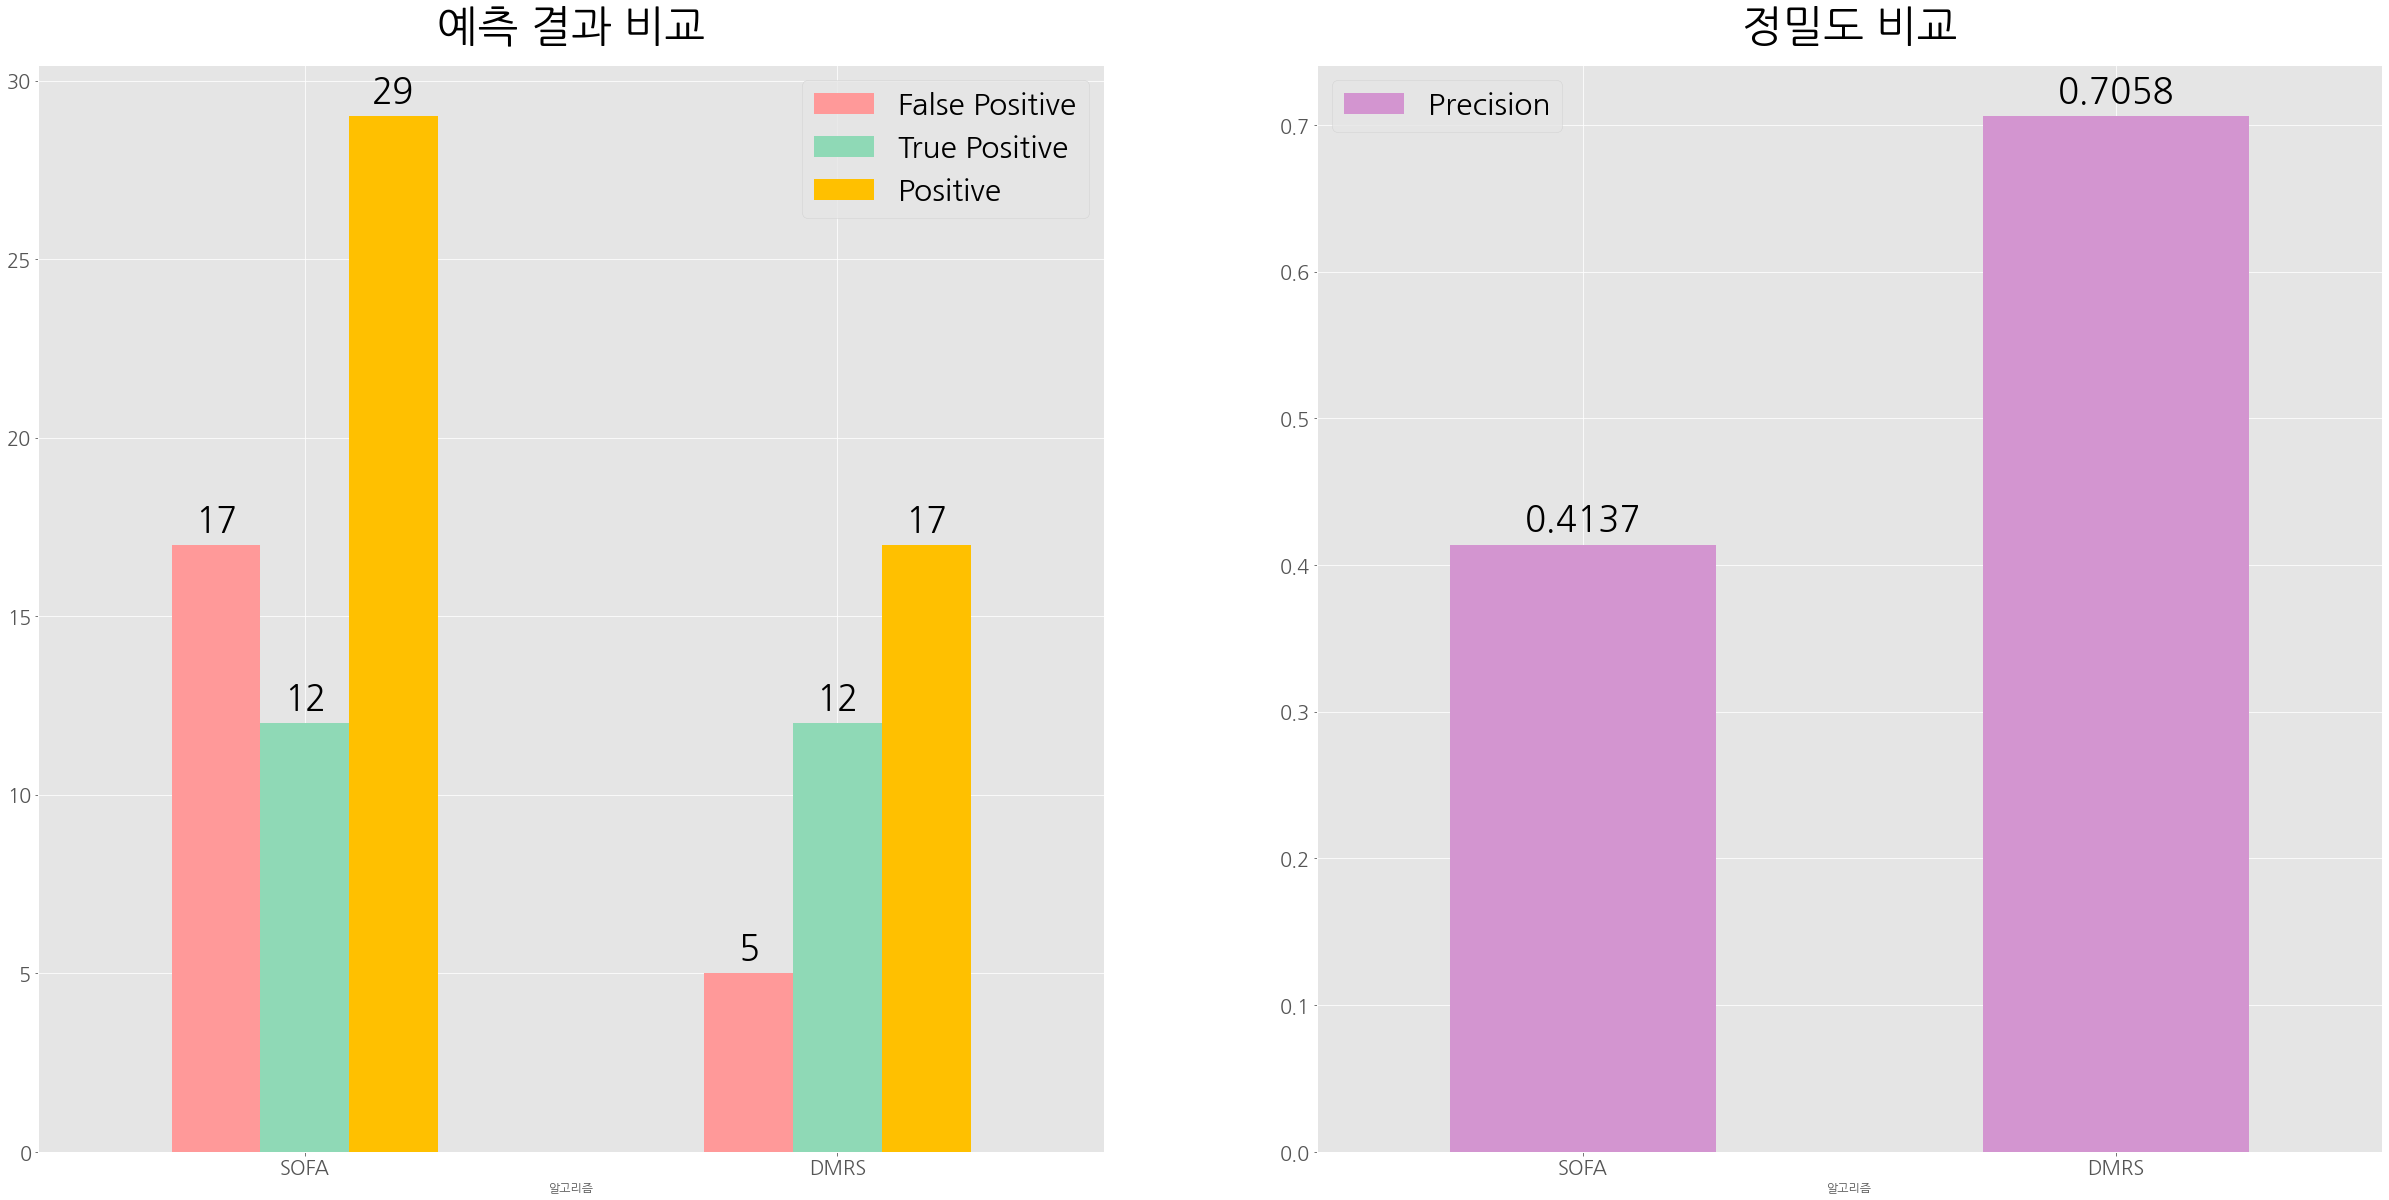

In [21]:
fig = plt.figure(figsize=(42,20))
plt.style.use('ggplot')
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

plt.rc('font', size=30)        # 기본 폰트 크기
plt.rc('axes', labelsize=0)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('figure', titlesize=20) # figure title 폰트 크기
plt.rc('legend', fontsize=30)  # 범례 폰트 크기

sensitivity_df.plot(ax=ax1, kind='bar',   rot=0, color=['#ff9999', '#8fd9b6', '#ffc000'])
precision_df.plot(ax=ax2, kind='bar', rot=0, color=['#d395d0'])

ax1.legend(sensitivity_df.columns, loc='best')
ax1.set_title('예측 결과 비교', pad=25)
ax2.set_title('정밀도 비교', pad=25)

for patch in ax1.patches:
    ax1.text(x = patch.get_x() + patch.get_width()/2, 
             y = patch.get_height() + len(sensitivity_df)*0.2,
             s = f'{patch.get_height()}', fontsize=35,
             ha = 'center')
    

for patch in ax2.patches:
    ax2.text(x = patch.get_x() + patch.get_width()/2, 
             y = patch.get_height() + len(precision_df)*0.005,
             s = f'{patch.get_height()}', fontsize=35,
             ha = 'center')



<Figure size 1080x1080 with 0 Axes>

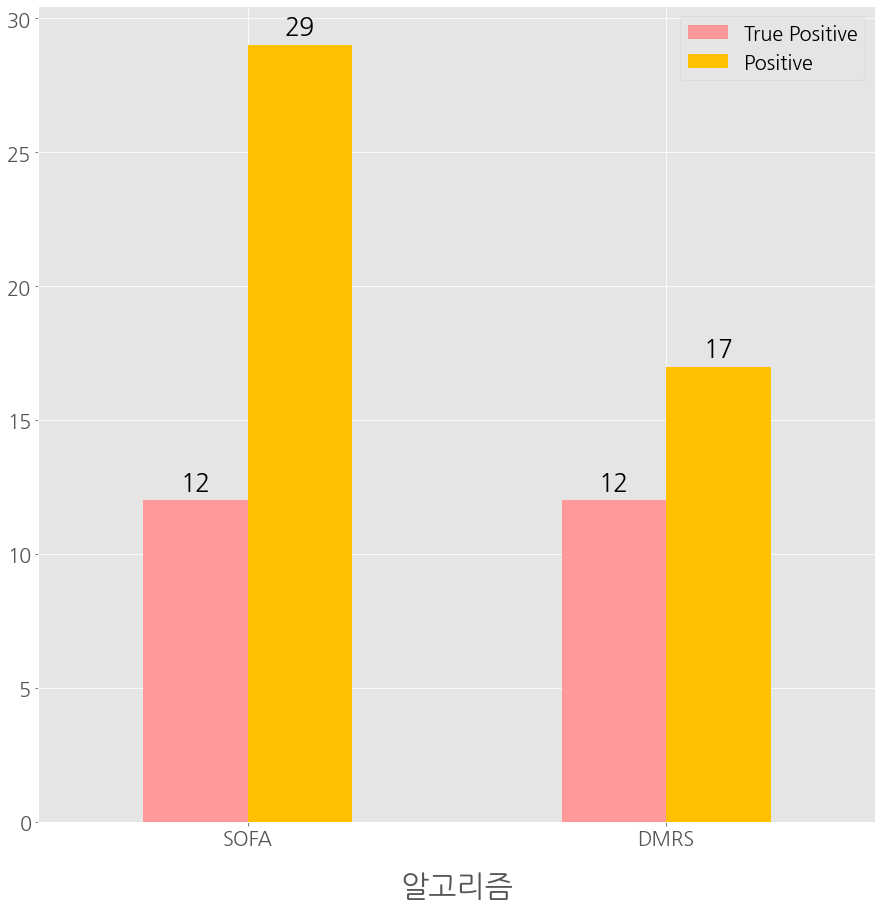

In [ ]:
# 동일 특이도에서의 True Positive 수
plt.figure(figsize=(15,15))
plt.style.use('ggplot')

plt.rc('font', size=25)        # 기본 폰트 크기
plt.rc('axes', labelsize=30)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('figure', titlesize=20) # figure title 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기

ax = sensitivity_df.plot(kind='bar', rot=0, color=['#ff9999', '#ffc000'], figsize=(15,15))
ax.legend(sensitivity_df.columns, loc='best')
ax.set_xlabel(xlabel='알고리즘', labelpad=25)


for patch in ax.patches:
    ax.text(x = patch.get_x() + patch.get_width()/2, 
             y = patch.get_height() + len(sensitivity_df)*0.2,
             s = f'{patch.get_height()}', fontsize=25,
             ha = 'center')

plt.show()

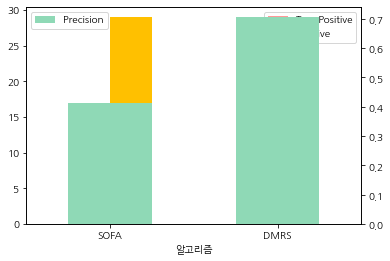

In [ ]:
fig, ax1 = plt.subplots()
sensitivity_df.plot(ax=ax1, kind='bar', rot=0, color=['#ff9999', '#ffc000'])

ax2 = ax1.twinx()
precision_df.plot(ax=ax2, kind='bar',  rot=0, color=['#8fd9b6'])

plt.show()

## CNN

In [ ]:
# import libraries
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import os
import numpy as np
import pandas as pd
import math, random
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
import missingno as msno

# display all columns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_row', None)

In [ ]:
# load data
test_data = pd.read_csv('/content/gdrive/MyDrive/최종프로젝트/physionet2012_test.csv')

test_data.drop(['Unnamed: 0'], axis=1, inplace=True)
test_df = test_data.copy()
test_df

,pid,rec_time,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,Tropl,TroponinI,TropT,TroponinT,Urine,WBC,pH,MechVent,survival,SBP,DBP,MBP,male,female,surv_los,LOS
0,135089,0:00:00,90.0000,1.0000,3.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0000,97.0000,37.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0000,58.0000,77.0000,1,0,-7,6
1,135089,0:44:00,90.0000,1.0000,3.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0000,NaN,2.9000,NaN,NaN,NaN,NaN,NaN,19.0000,97.0000,37.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0000,58.0000,77.0000,1,0,-7,6
2,135089,2:09:00,90.0000,1.0000,3.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0000,97.0000,38.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0000,58.0000,77.0000,1,0,-7,6
3,135089,2:10:00,90.0000,1.0000,3.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0000,97.0000,38.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0000,58.0000,77.0000,1,0,-7,6
4,135089,2:15:00,90.0000,1.0000,3.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0000,97.0000,38.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0000,58.0000,77.0000,1,0,-7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29549,135219,22:45:00,78.0000,0.0000,4.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0000,98.0000,37.6000,NaN,NaN,NaN,NaN,35.0000,NaN,NaN,NaN,2011,134.0000,51.0000,79.0000,1,0,2002,9
29550,135219,22:49:00,78.0000,0.0000,4.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0000,98.0000,37.6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,132.0000,50.0000,78.0000,1,0,2002,9
29551,135219,23:45:00,78.0000,0.0000,4.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0000,98.0000,37.7000,NaN,NaN,NaN,NaN,45.0000,NaN,NaN,NaN,2011,139.0000,54.0000,84.0000,1,0,2002,9
29552,135219,"1 day, 12:28:00",78.0000,0.0000,4.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0000,NaN,NaN,NaN,NaN,40.0000,90.0000,NaN,18.0000,98.0000,37.7000,NaN,NaN,NaN,NaN,NaN,NaN,7.3700,NaN,2011,139.0000,54.0000,84.0000,1,0,2002,9


In [ ]:
icut2 = test_df[test_df['ICUType'] == 2]
icut2

,pid,rec_time,age,Gender,ICUType,ALP,ALT,AST,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,FiO2,GCS,Glucose,HCO3,HCT,HR,K,Lactate,Mg,Na,PaCO2,PaO2,Platelets,RR,SPO2,BT,Tropl,TroponinI,TropT,TroponinT,Urine,WBC,pH,MechVent,survival,SBP,DBP,MBP,male,female,surv_los,LOS
64,142245,0:00:00,86.0000,1.0000,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0000,97.0000,37.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0000,58.0000,77.0000,1,0,-8,7
65,142245,1:47:00,86.0000,1.0000,2.0000,37.0000,17.0000,39.0000,2.4000,13.0000,1.2000,NaN,0.9000,NaN,NaN,128.0000,23.0000,31.9000,86.0000,3.9000,NaN,1.7000,142.0000,NaN,NaN,106.0000,19.0000,97.0000,37.1000,NaN,NaN,NaN,NaN,NaN,9.4000,NaN,NaN,-1,116.0000,58.0000,77.0000,1,0,-8,7
66,142245,7:14:00,86.0000,1.0000,2.0000,NaN,NaN,NaN,NaN,12.0000,NaN,NaN,0.9000,NaN,NaN,115.0000,23.0000,29.2000,86.0000,3.9000,NaN,1.7000,142.0000,NaN,NaN,112.0000,19.0000,97.0000,37.1000,NaN,NaN,NaN,NaN,NaN,8.2000,NaN,NaN,-1,116.0000,58.0000,77.0000,1,0,-8,7
67,142245,13:23:00,86.0000,1.0000,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0000,NaN,NaN,NaN,NaN,36.0000,228.0000,NaN,19.0000,97.0000,37.1000,NaN,NaN,NaN,NaN,NaN,NaN,7.3900,NaN,-1,116.0000,58.0000,77.0000,1,0,-8,7
68,142245,14:23:00,86.0000,1.0000,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0000,NaN,0.9000,NaN,NaN,NaN,NaN,NaN,19.0000,97.0000,37.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,116.0000,58.0000,77.0000,1,0,-8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29507,137755,"1 day, 20:41:00",81.0000,0.0000,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0000,98.0000,37.3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,122.0000,47.0000,72.0000,1,0,59,14
29508,137755,"1 day, 21:41:00",81.0000,0.0000,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0000,NaN,NaN,NaN,81.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0000,98.0000,37.3000,NaN,NaN,NaN,NaN,300.0000,NaN,NaN,NaN,73,108.0000,46.0000,66.0000,1,0,59,14
29509,137755,"1 day, 22:11:00",81.0000,0.0000,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0000,98.0000,37.3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,149.0000,65.0000,66.0000,1,0,59,14
29510,137755,"1 day, 22:41:00",81.0000,0.0000,2.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0000,98.0000,37.3000,NaN,NaN,NaN,NaN,110.0000,NaN,NaN,NaN,73,129.0000,55.0000,81.0000,1,0,59,14


In [ ]:
icut2['pid'].unique()

array([142245, 137567, 138127, 133122, 139385, 142205, 132959, 136195,
       140781, 136029, 135880, 140873, 136897, 137811, 139544, 135013,
       138253, 140245, 137627, 137334, 137274, 139296, 132567, 136785,
       138841, 134992, 141207, 133499, 140208, 138621, 140582, 137657,
       135088, 138636, 133890, 139910, 141326, 136457, 135894, 141817,
       141454, 139062, 141368, 134355, 139572, 136638, 133154, 141359,
       136176, 137328, 135347, 136594, 137088, 141155, 142138, 138699,
       138751, 135072, 133166, 138830, 138658, 138788, 138210, 135236,
       138107, 136004, 135300, 136263, 137648, 135474, 137256, 132590,
       142353, 138759, 137001, 141640, 139496, 140270, 139155, 135449,
       141218, 138261, 141274, 137896, 137285, 137755])

In [ ]:
# ICUType=2
# pid = 142245
# HR, RR, BT, SPO2, SBP, DBP

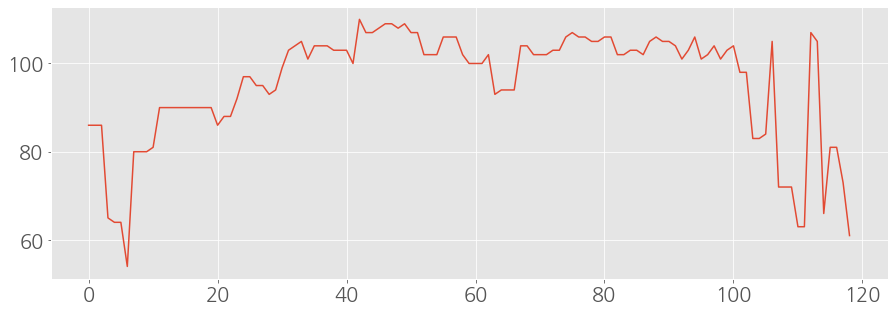

In [ ]:
pid=137755
plt.figure(figsize=(15, 5))
plt.plot(test_df.query('pid==@pid').HR.values)

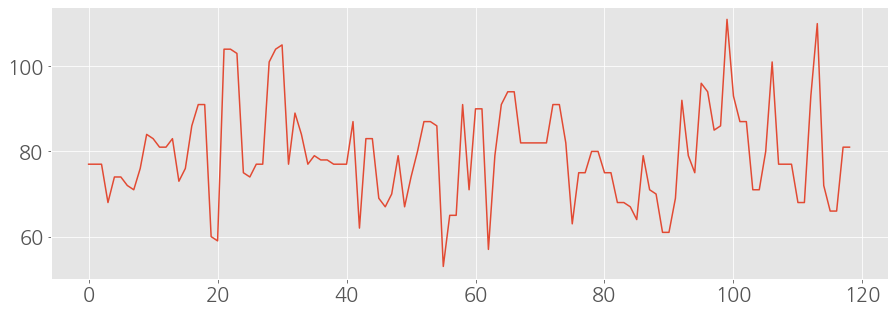

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(test_df.query('pid==@pid').MBP.values)

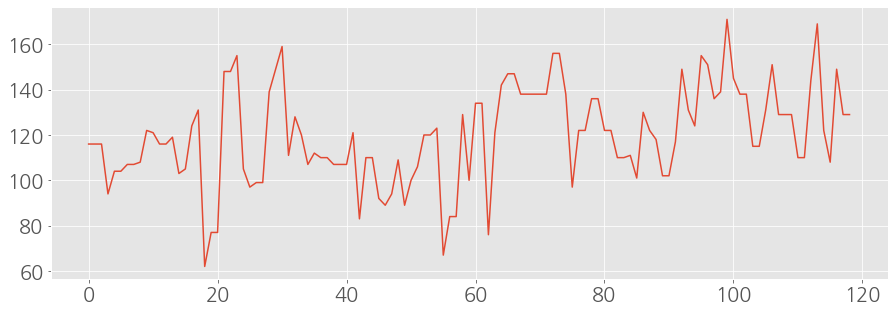

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(test_df.query('pid==@pid').SBP.values)

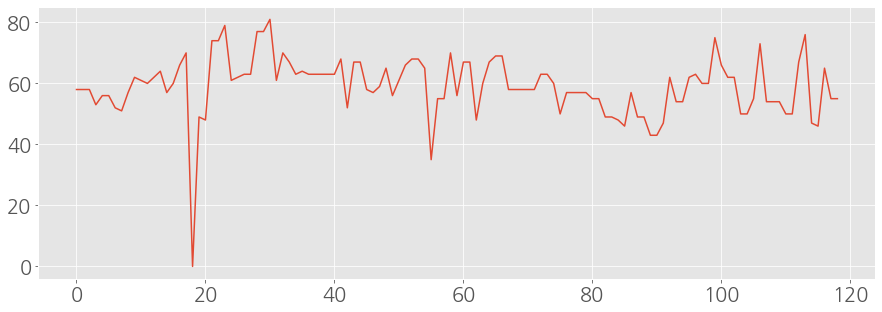

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(test_df.query('pid==@pid').DBP.values)

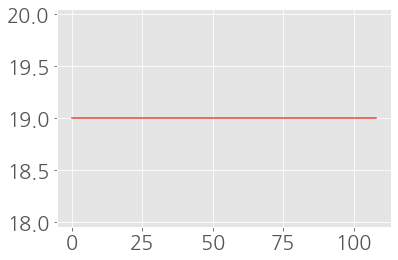

In [ ]:
plt.plot(test_df.query('pid==137285').RR.values)

(-5.9, 123.9, 50.1, 113.9)

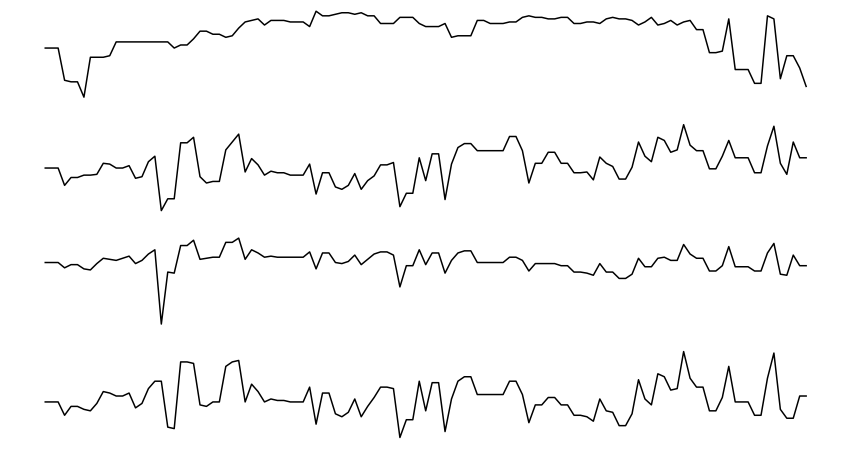

In [ ]:
plt.figure(figsize=(15, 8))
plt.axis('off')
plt.subplot(4, 1, 1)
plt.plot(test_df.query('pid==@pid').HR.values, color='black')
plt.axis('off')

plt.subplot(4, 1, 2)
plt.plot(test_df.query('pid==@pid').SBP.values, color='black')
plt.axis('off')

plt.subplot(4, 1, 3)
plt.plot(test_df.query('pid==@pid').DBP.values, color='black')
plt.axis('off')

plt.subplot(4, 1, 4)
plt.plot(test_df.query('pid==@pid').MBP.values, color='black')
plt.axis('off')